# Importation et inspection des données

In [31]:
#changement de dossier
import os
os.chdir("C:/Users/ricco/Desktop/demo")

#chargement individus actifs
import pandas
XAct = pandas.read_excel("AUTOS2005_ACP.xlsx",sheet_name="AUTOS.ACTIVES",index_col=0)

#info
XAct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, SANTA_FE     to YARIS       
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   puissance  32 non-null     int64
 1   cylindree  32 non-null     int64
 2   vitesse    32 non-null     int64
 3   longueur   32 non-null     int64
 4   largeur    32 non-null     int64
 5   hauteur    32 non-null     int64
 6   poids      32 non-null     int64
dtypes: int64(7)
memory usage: 2.0+ KB


In [32]:
#stats. descriptives
XAct.describe()

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids
count,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,152.43750,2246.875000,198.187500,435.500000,177.531250,153.125000,1426.093750
std,72.05282,1006.986554,31.210459,47.143569,10.105841,11.561198,373.330379
min,54.00000,998.000000,150.000000,344.000000,159.000000,141.000000,840.000000
25%,100.00000,1597.250000,171.500000,390.000000,170.000000,144.750000,1196.250000
50%,142.50000,1996.000000,200.000000,448.000000,177.000000,148.000000,1390.500000
75%,205.50000,2616.750000,218.500000,474.250000,185.000000,159.250000,1630.000000
max,340.00000,5654.000000,250.000000,506.000000,203.000000,185.000000,2495.000000


# ACP avec le package "fanalysis"

In [33]:
#installation à la volée du package (si nécessaire)
#!pip install fanalysis

In [34]:
#classe de calcul
from fanalysis.pca import PCA

#demander une acp normée
acp = PCA(std_unit=True,stats=True,col_labels=XAct.columns,row_labels=XAct.index)

#acp à partir de la matrice numpy
acp.fit(XAct.values)

PCA(col_labels=Index(['puissance', 'cylindree', 'vitesse', 'longueur', 'largeur', 'hauteur',
       'poids'],
      dtype='object'),
    row_labels=Index(['SANTA_FE    ', 'MURANO      ', 'LANDCRUI    ', 'OUTLAND     ',
       'X-TRAIL     ', 'CITRONC5    ', 'VELSATIS    ', 'LAGUNA      ',
       'CITRONC4    ', 'CLIO        ', 'CITRONC2    ', 'MODUS       ',
       'TWINGO      ', 'BMW530      ', 'MERC_E      ', 'AUDIA8     ',
       'MONDEO      ', 'VECTRA      ', 'PASSAT      ', 'BMW X5      ',
       'MERC_A      ', 'ALFA 156    ', 'AUDIA3      ', 'GOLF        ',
       'MUSA        ', 'FIESTA      ', 'CORSA       ', 'PANDA       ',
       'AVENSIS     ', 'CHRYS300    ', 'PTCRUISER   ', 'YARIS       '],
      dtype='object', name='Modele'))

In [35]:
#affichage des valeurs propres
acp.eig_

array([[4.84690185e+00, 1.35853696e+00, 3.94816397e-01, 2.14296119e-01,
        1.10008637e-01, 4.54829734e-02, 2.99570605e-02],
       [6.92414550e+01, 1.94076709e+01, 5.64023424e+00, 3.06137313e+00,
        1.57155196e+00, 6.49756762e-01, 4.27958007e-01],
       [6.92414550e+01, 8.86491259e+01, 9.42893601e+01, 9.73507333e+01,
        9.89222852e+01, 9.95720420e+01, 1.00000000e+02]])

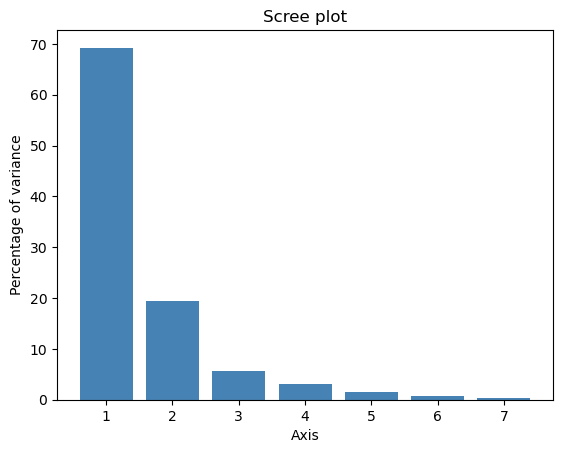

In [36]:
#éboulis des val.p (variance expliquée)
acp.plot_eigenvalues(type="percentage")

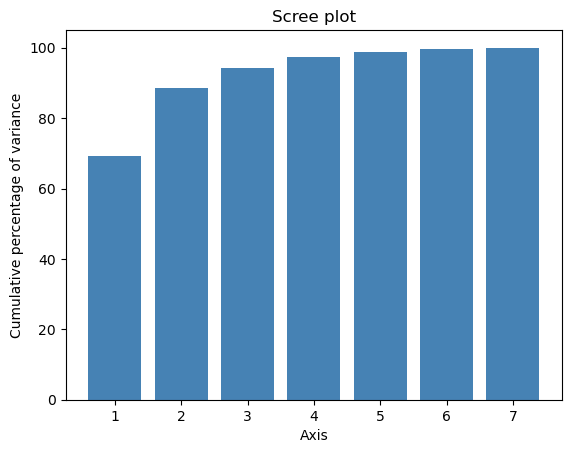

In [37]:
#cumulatif
acp.plot_eigenvalues(type="cumulative")

## Informations sur les variables

In [38]:
#informations sur les variables
info_var = acp.col_topandas()
info_var.columns

Index(['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4',
       'col_coord_dim5', 'col_coord_dim6', 'col_coord_dim7',
       'col_contrib_dim1', 'col_contrib_dim2', 'col_contrib_dim3',
       'col_contrib_dim4', 'col_contrib_dim5', 'col_contrib_dim6',
       'col_contrib_dim7', 'col_cos2_dim1', 'col_cos2_dim2', 'col_cos2_dim3',
       'col_cos2_dim4', 'col_cos2_dim5', 'col_cos2_dim6', 'col_cos2_dim7'],
      dtype='object')

In [39]:
#coordonnées des var. = corrélations avec les axes
info_var[['col_coord_dim1','col_coord_dim2']]

,col_coord_dim1,col_coord_dim2
puissance,0.928276,-0.192272
cylindree,0.906758,-0.005956
vitesse,0.772816,-0.557399
longueur,0.930717,-0.084841
largeur,0.892656,0.077714
hauteur,0.301660,0.921958
poids,0.900934,0.384181


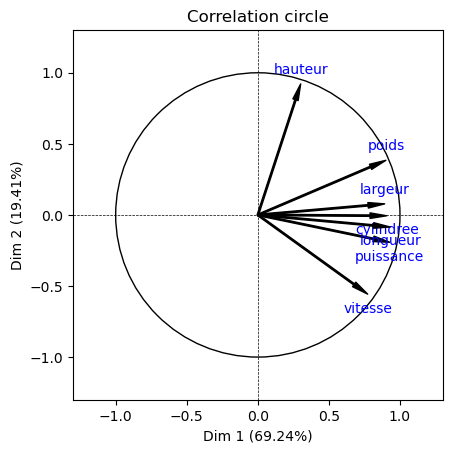

In [40]:
#cercle de corrélations
acp.correlation_circle(num_x_axis=1,num_y_axis=2)

In [41]:
#contributions des variables
info_var[['col_contrib_dim1', 'col_contrib_dim2']]

,col_contrib_dim1,col_contrib_dim2
puissance,17.778300,2.721194
cylindree,16.963603,0.002611
vitesse,12.322199,22.869711
longueur,17.871931,0.529831
largeur,16.440083,0.444556
hauteur,1.877459,62.567853
poids,16.746425,10.864245


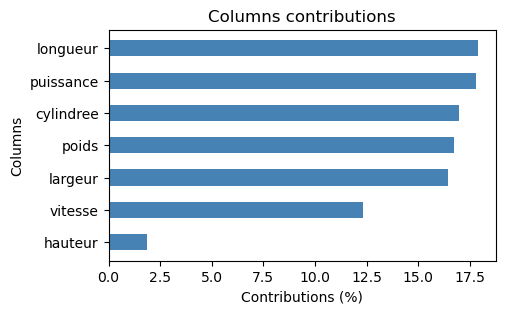

In [44]:
#sous forme graphique et ordonnée
acp.plot_col_contrib(num_axis=1,figsize=(5,3))

In [45]:
#les cos2
info_var[['col_cos2_dim1', 'col_cos2_dim2']]

,col_cos2_dim1,col_cos2_dim2
puissance,0.861697,0.036968
cylindree,0.822209,0.000035
vitesse,0.597245,0.310693
longueur,0.866235,0.007198
largeur,0.796835,0.006039
hauteur,0.090999,0.850007
poids,0.811683,0.147595


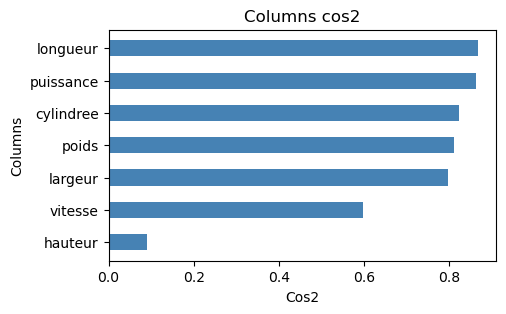

In [46]:
#aussi graphique
acp.plot_col_cos2(num_axis=1,figsize=(5,3))

In [47]:
#cumul pour les 2 premiers axes
info_var[['col_cos2_dim1', 'col_cos2_dim2']].cumsum(axis=1)

,col_cos2_dim1,col_cos2_dim2
puissance,0.861697,0.898665
cylindree,0.822209,0.822245
vitesse,0.597245,0.907938
longueur,0.866235,0.873433
largeur,0.796835,0.802874
hauteur,0.090999,0.941006
poids,0.811683,0.959278


## Informations sur les individus

In [48]:

#coordonnées et autres infos
info_indiv = acp.row_topandas()
info_indiv.columns


Index(['row_coord_dim1', 'row_coord_dim2', 'row_coord_dim3', 'row_coord_dim4',
       'row_coord_dim5', 'row_coord_dim6', 'row_coord_dim7',
       'row_contrib_dim1', 'row_contrib_dim2', 'row_contrib_dim3',
       'row_contrib_dim4', 'row_contrib_dim5', 'row_contrib_dim6',
       'row_contrib_dim7', 'row_cos2_dim1', 'row_cos2_dim2', 'row_cos2_dim3',
       'row_cos2_dim4', 'row_cos2_dim5', 'row_cos2_dim6', 'row_cos2_dim7'],
      dtype='object')

In [49]:
#coordonnées dans le plan
info_indiv[['row_coord_dim1', 'row_coord_dim2']]

,row_coord_dim1,row_coord_dim2
Modele,,
SANTA_FE,0.475700,2.178541
MURANO,2.540009,1.421426
LANDCRUI,3.514133,3.510020
OUTLAND,0.992043,0.634991
X-TRAIL,0.026017,1.419907
CITRONC5,1.307989,-0.899373
VELSATIS,1.189793,0.571276
LAGUNA,0.181697,-1.167515
CITRONC4,-0.292433,-0.620006


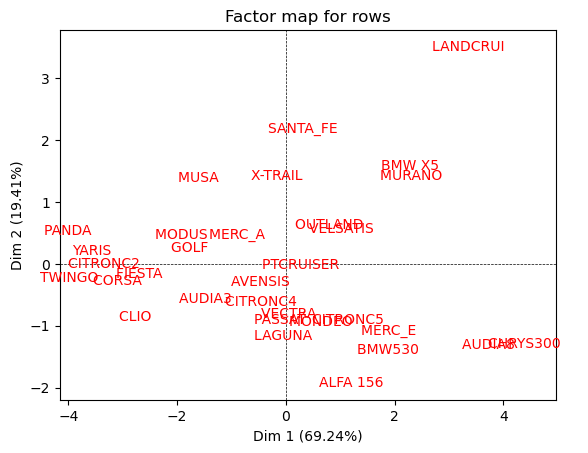

In [50]:
#carte des individus
acp.mapping_row(num_x_axis=1,num_y_axis=2)

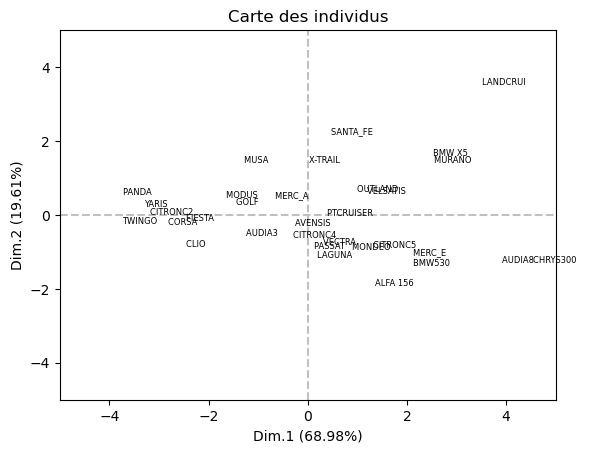

In [51]:
#coordonnées dans le plan
coord = info_indiv[['row_coord_dim1', 'row_coord_dim2']]

#pour ne pas être trompé par la mise à l'échelle auto du graphique
import matplotlib.pyplot as plt
axe = plt.gca()

#délimiter
axe.axis([-5,+5,-5,+5])
axe.plot([-5,+5],[0,0],color='silver',linestyle='--')
axe.plot([0,0],[-5,+5],color='silver',linestyle='--')
axe.set_xlabel("Dim.1 (68.98%)")
axe.set_ylabel("Dim.2 (19.61%)")
plt.title("Carte des individus")
for i in range(coord.shape[0]):
    axe.text(coord.iloc[i,0],coord.iloc[i,1],coord.index[i],fontsize=6)
plt.show()

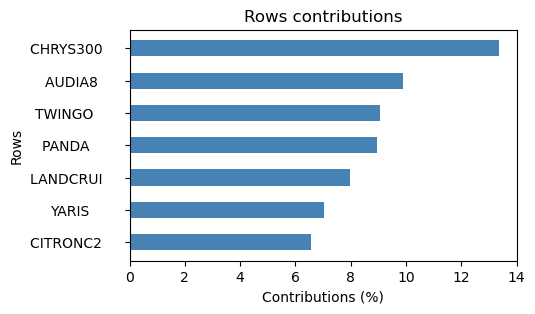

In [52]:
#contributions aux axes - CTR
acp.plot_row_contrib(num_axis=1,nb_values=7,figsize=(5,3))

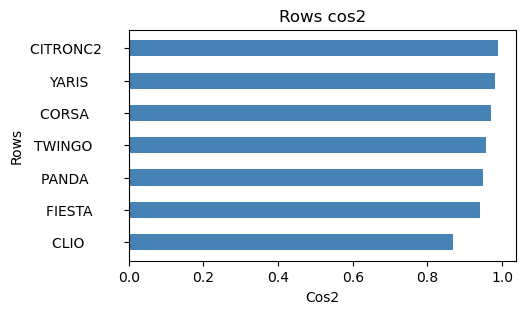

In [53]:
#qualité de représentation -- COS2
acp.plot_row_cos2(num_axis=1,nb_values=7,figsize=(5,3))

In [54]:
#les contributions sur les 2 premiers axes
contrib = info_indiv[['row_contrib_dim1', 'row_contrib_dim2']]
contrib.head()

,row_contrib_dim1,row_contrib_dim2
Modele,,
SANTA_FE,0.145899,10.917166
MURANO,4.159645,4.647580
LANDCRUI,7.962002,28.339860
OUTLAND,0.634522,0.927500
X-TRAIL,0.000436,4.637657


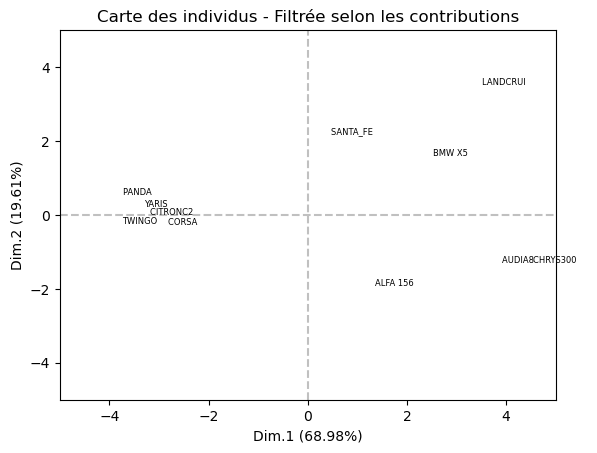

In [55]:
#graphique avec filtrage sur les contributions
axe = plt.gca()

#délimiter
axe.axis([-5,+5,-5,+5])
axe.plot([-5,+5],[0,0],color='silver',linestyle='--')
axe.plot([0,0],[-5,+5],color='silver',linestyle='--')
axe.set_xlabel("Dim.1 (68.98%)")
axe.set_ylabel("Dim.2 (19.61%)")
plt.title("Carte des individus - Filtrée selon les contributions")
for i in range(coord.shape[0]):
    if (contrib.iloc[i,0] > 5.0) or (contrib.iloc[i,1] > 5.0):
        axe.text(coord.iloc[i,0],coord.iloc[i,1],coord.index[i],fontsize=6)
plt.show()

# Variables illustratives

In [56]:
#chargement
XIllus = pandas.read_excel("AUTOS2005_ACP.xlsx",sheet_name="VAR.ILLUSTRATIVES",index_col=0)
XIllus

,prix,origine
Modele,,
SANTA_FE,27990,Autres
MURANO,44000,Autres
LANDCRUI,67100,Autres
OUTLAND,29990,Autres
X-TRAIL,29700,Autres
CITRONC5,33000,France
VELSATIS,38250,France
LAGUNA,25350,France
CITRONC4,23400,France


In [57]:
#corrélations de la variable "prix" avec les 2 premiers facteurs
info_indiv[['row_coord_dim1', 'row_coord_dim2']].corrwith(XIllus.prix)

row_coord_dim1    0.928609
row_coord_dim2    0.049083
dtype: float64

In [58]:
#copie des données
coord = info_indiv[['row_coord_dim1', 'row_coord_dim2']].copy()
coord['origine'] = XIllus.origine

#moyennes conditionnelles de "origine" par facteur
for j in range(2):
    print(pandas.pivot_table(coord,values=coord.columns[j],index=['origine'],aggfunc='mean'),'\n')

         row_coord_dim1
origine                
Autres         0.991158
Europe        -0.017846
France        -1.081592 

         row_coord_dim2
origine                
Autres         0.864574
Europe        -0.337511
France        -0.339812 



# Projection des individus supplémentaires

In [59]:
#chargement des individus supplémentaires
XSupp = pandas.read_excel("AUTOS2005_ACP.xlsx",sheet_name="AUTOS.SUPPLEMENTAIRES",index_col=0)
XSupp

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids
Modele,,,,,,,
P607,204,2721,230,491,184,145,1723
P407,136,1997,212,468,182,145,1415
P1007,75,1360,165,374,169,161,1181


In [60]:
#calcul des coordonnées
coord_supp = acp.transform(XSupp)
coord_supp

,0,1,2,3,4,5,6
Modele,,,,,,,
P607,1.869281,-0.959795,-0.424111,-0.072925,-0.430508,0.243279,-0.033405
P407,0.324345,-0.771279,-0.877258,-0.054693,-0.192090,-0.067729,-0.092201
P1007,-2.294401,1.068201,0.221470,-0.147037,0.282814,-0.010872,-0.142321


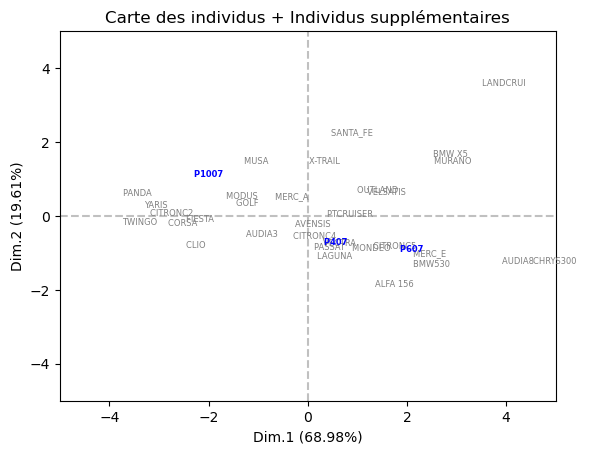

In [61]:
#les places dans la carte des individus
coord = info_indiv[['row_coord_dim1', 'row_coord_dim2']]

#délimiter
axe = plt.gca()
axe.axis([-5,+5,-5,+5])
axe.plot([-5,+5],[0,0],color='silver',linestyle='--')
axe.plot([0,0],[-5,+5],color='silver',linestyle='--')
axe.set_xlabel("Dim.1 (68.98%)")
axe.set_ylabel("Dim.2 (19.61%)")
plt.title("Carte des individus + Individus supplémentaires")
#individus actifs
for i in range(coord.shape[0]):
    axe.text(coord.iloc[i,0],coord.iloc[i,1],coord.index[i],fontsize=6,color='gray')

for i in range(coord_supp.shape[0]):
    axe.text(coord_supp.iloc[i,0],coord_supp.iloc[i,1],coord_supp.index[i],fontsize=6,fontweight='bold',color='blue')
plt.show()